In [27]:
import pandas as pd
import pandas_datareader as web
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_curve
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#Import models
from xgboost import XGBClassifier, plot_importance

from collections import Counter
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
import seaborn as sns

In [28]:
full_df = pd.read_csv('data/full_df.csv')

full_df['Date'] = pd.to_datetime(full_df['Date'])
full_df.set_index('Date', inplace=True)

### Bullish Models
#### Full Model: bull_xgb_rcv1

In [29]:
X = full_df.drop(['bull_target', 'bear_target'], axis=1)
y = full_df['bull_target']

#Split into training, testing, validation sets
X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.30, random_state=24)
X_test, X_valid, y_test, y_valid = train_test_split(X_split, y_split, test_size=0.50, random_state=24)

print(X_train.columns)

Index(['Returns', 'Unemployment Rate', 'Inflation Rate', 'Misery Index',
       'local_price', 'Bullish', 'Neutral', 'Bearish', 'EMA12_pctchg', 'RSI',
       'Pct_Chg', 'MACD_sentiment', 'Upper_BB_pctchg', 'Lower_BB_pctchg',
       'EMA_sentiment', 'Volume_sentiment'],
      dtype='object')


In [30]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.02],
        'n_estimators': [500, 600, 700, 800, 900]
        }


xgb = XGBClassifier(objective='binary:logistic')

fit_params={"early_stopping_rounds": 45, 
            "eval_set" : [[X_valid, y_valid]]}

bull_xgb_rcv1 = RandomizedSearchCV(xgb, param_distributions=params, scoring='f1',
                             n_jobs=-1, cv=2, verbose=3)

bull_xgb_rcv1.fit(X_train, y_train, **fit_params)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    6.1s remaining:    4.0s


[0]	validation_0-error:0.33426
Will train until validation_0-error hasn't improved in 45 rounds.
[1]	validation_0-error:0.29815
[2]	validation_0-error:0.31111
[3]	validation_0-error:0.31111
[4]	validation_0-error:0.31389
[5]	validation_0-error:0.30926
[6]	validation_0-error:0.30463
[7]	validation_0-error:0.29537
[8]	validation_0-error:0.30648
[9]	validation_0-error:0.30370
[10]	validation_0-error:0.30463
[11]	validation_0-error:0.29630
[12]	validation_0-error:0.28981
[13]	validation_0-error:0.28796
[14]	validation_0-error:0.29167
[15]	validation_0-error:0.28889
[16]	validation_0-error:0.29167
[17]	validation_0-error:0.28704
[18]	validation_0-error:0.28981
[19]	validation_0-error:0.29074


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.2s finished


[20]	validation_0-error:0.29074
[21]	validation_0-error:0.28981
[22]	validation_0-error:0.28704
[23]	validation_0-error:0.28519
[24]	validation_0-error:0.28611
[25]	validation_0-error:0.28704
[26]	validation_0-error:0.28056
[27]	validation_0-error:0.28056
[28]	validation_0-error:0.27963
[29]	validation_0-error:0.28241
[30]	validation_0-error:0.28148
[31]	validation_0-error:0.28148
[32]	validation_0-error:0.27778
[33]	validation_0-error:0.27685
[34]	validation_0-error:0.27685
[35]	validation_0-error:0.28056
[36]	validation_0-error:0.28056
[37]	validation_0-error:0.28056
[38]	validation_0-error:0.27685
[39]	validation_0-error:0.27870
[40]	validation_0-error:0.27870
[41]	validation_0-error:0.27500
[42]	validation_0-error:0.27407
[43]	validation_0-error:0.27593
[44]	validation_0-error:0.27593
[45]	validation_0-error:0.27407
[46]	validation_0-error:0.27315
[47]	validation_0-error:0.27130
[48]	validation_0-error:0.27037
[49]	validation_0-error:0.27037
[50]	validation_0-error:0.27037
[51]	val

[271]	validation_0-error:0.18704
[272]	validation_0-error:0.18426
[273]	validation_0-error:0.18426
[274]	validation_0-error:0.18611
[275]	validation_0-error:0.18611
[276]	validation_0-error:0.18333
[277]	validation_0-error:0.18333
[278]	validation_0-error:0.18241
[279]	validation_0-error:0.18426
[280]	validation_0-error:0.18333
[281]	validation_0-error:0.18333
[282]	validation_0-error:0.18241
[283]	validation_0-error:0.18333
[284]	validation_0-error:0.18241
[285]	validation_0-error:0.18241
[286]	validation_0-error:0.18241
[287]	validation_0-error:0.18241
[288]	validation_0-error:0.18241
[289]	validation_0-error:0.18241
[290]	validation_0-error:0.18241
[291]	validation_0-error:0.18148
[292]	validation_0-error:0.18241
[293]	validation_0-error:0.18333
[294]	validation_0-error:0.18241
[295]	validation_0-error:0.18148
[296]	validation_0-error:0.18241
[297]	validation_0-error:0.18241
[298]	validation_0-error:0.18241
[299]	validation_0-error:0.18241
[300]	validation_0-error:0.18426
[301]	vali

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [31]:
bull_xgb_rcv1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
train_predictions = bull_xgb_rcv1.best_estimator_.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, train_predictions))
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("=======================================================")
predictions = bull_xgb_rcv1.best_estimator_.predict(X_valid)
print("Validation Accuracy: ", accuracy_score(y_valid, predictions))
print(confusion_matrix(y_valid, predictions))
TN, FP, FN, TP = confusion_matrix(y_valid, predictions).ravel()
print(classification_report(y_valid, predictions))
print("=======================================================")
predictions = bull_xgb_rcv1.best_estimator_.predict(X_test)
print("Testing Accuracy: ", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
print(classification_report(y_test, predictions))

Training Accuracy:  0.8816285998013903
[[1391  471]
 [ 125 3048]]
              precision    recall  f1-score   support

         0.0       0.92      0.75      0.82      1862
         1.0       0.87      0.96      0.91      3173

    accuracy                           0.88      5035
   macro avg       0.89      0.85      0.87      5035
weighted avg       0.89      0.88      0.88      5035

Validation Accuracy:  0.8277777777777777
[[255 137]
 [ 49 639]]
              precision    recall  f1-score   support

         0.0       0.84      0.65      0.73       392
         1.0       0.82      0.93      0.87       688

    accuracy                           0.83      1080
   macro avg       0.83      0.79      0.80      1080
weighted avg       0.83      0.83      0.82      1080

Testing Accuracy:  0.8341056533827618
[[228 147]
 [ 32 672]]
              precision    recall  f1-score   support

         0.0       0.88      0.61      0.72       375
         1.0       0.82      0.95      0.88   

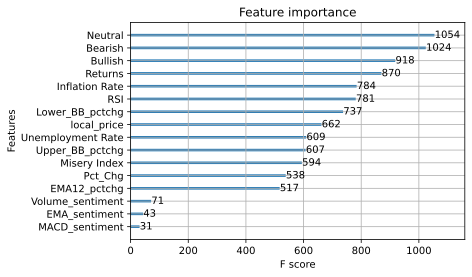

In [33]:
plot_importance(bull_xgb_rcv1.best_estimator_)
plt.show()

#### Drop the Worst Features

In [34]:
X = full_df.drop(['bull_target', 'bear_target', 'EMA_sentiment', 'MACD_sentiment', 'Volume_sentiment'], 
                 axis=1)

y = full_df['bull_target']

#Split into training, testing, validation sets
X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.30, random_state=24)
X_test, X_valid, y_test, y_valid = train_test_split(X_split, y_split, test_size=0.50, random_state=24)

In [35]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.02],
        'n_estimators': [400, 500, 600, 700, 800]
        }

xgb = XGBClassifier(objective='binary:logistic')

fit_params={"early_stopping_rounds": 45, 
            "eval_set" : [[X_valid, y_valid]]}

bull_xgb_rcv2 = RandomizedSearchCV(xgb, param_distributions=params, scoring='f1', 
                             n_jobs=-1, cv=10, verbose=3)

bull_xgb_rcv2.fit(X_train, y_train, **fit_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s


[0]	validation_0-error:0.33056
Will train until validation_0-error hasn't improved in 45 rounds.
[1]	validation_0-error:0.29722
[2]	validation_0-error:0.30463
[3]	validation_0-error:0.28611
[4]	validation_0-error:0.28796
[5]	validation_0-error:0.28704
[6]	validation_0-error:0.28611
[7]	validation_0-error:0.28148
[8]	validation_0-error:0.27778
[9]	validation_0-error:0.28241
[10]	validation_0-error:0.27685
[11]	validation_0-error:0.27685
[12]	validation_0-error:0.27593
[13]	validation_0-error:0.26852
[14]	validation_0-error:0.27130
[15]	validation_0-error:0.26944
[16]	validation_0-error:0.27037
[17]	validation_0-error:0.27222
[18]	validation_0-error:0.26759
[19]	validation_0-error:0.27500
[20]	validation_0-error:0.26944
[21]	validation_0-error:0.26296
[22]	validation_0-error:0.26296
[23]	validation_0-error:0.26296
[24]	validation_0-error:0.25926
[25]	validation_0-error:0.26111
[26]	validation_0-error:0.25833
[27]	validation_0-error:0.25926
[28]	validation_0-error:0.25833


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.6s finished


[29]	validation_0-error:0.25648
[30]	validation_0-error:0.25741
[31]	validation_0-error:0.25463
[32]	validation_0-error:0.25833
[33]	validation_0-error:0.25833
[34]	validation_0-error:0.25833
[35]	validation_0-error:0.25463
[36]	validation_0-error:0.25833
[37]	validation_0-error:0.25093
[38]	validation_0-error:0.25370
[39]	validation_0-error:0.25278
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.24907
[46]	validation_0-error:0.24907
[47]	validation_0-error:0.24444
[48]	validation_0-error:0.24444
[49]	validation_0-error:0.24352
[50]	validation_0-error:0.24537
[51]	validation_0-error:0.24537
[52]	validation_0-error:0.24722
[53]	validation_0-error:0.24444
[54]	validation_0-error:0.24537
[55]	validation_0-error:0.24352
[56]	validation_0-error:0.24352
[57]	validation_0-error:0.24074
[58]	validation_0-error:0.24352
[59]	validation_0-error:0.24352
[60]	val

[280]	validation_0-error:0.17315
[281]	validation_0-error:0.17407
[282]	validation_0-error:0.17407
[283]	validation_0-error:0.17315
[284]	validation_0-error:0.17315
[285]	validation_0-error:0.17407
[286]	validation_0-error:0.17407
[287]	validation_0-error:0.17500
[288]	validation_0-error:0.17500
[289]	validation_0-error:0.17500
[290]	validation_0-error:0.17593
[291]	validation_0-error:0.17593
[292]	validation_0-error:0.17500
[293]	validation_0-error:0.17407
[294]	validation_0-error:0.17222
[295]	validation_0-error:0.17130
[296]	validation_0-error:0.17222
[297]	validation_0-error:0.17315
[298]	validation_0-error:0.17315
[299]	validation_0-error:0.17315
[300]	validation_0-error:0.17315
[301]	validation_0-error:0.17315
[302]	validation_0-error:0.17315
[303]	validation_0-error:0.17222
[304]	validation_0-error:0.17315
[305]	validation_0-error:0.17315
[306]	validation_0-error:0.17315
[307]	validation_0-error:0.17222
[308]	validation_0-error:0.17407
[309]	validation_0-error:0.17222
[310]	vali

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [36]:
train_predictions = bull_xgb_rcv2.best_estimator_.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, train_predictions))
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("=======================================================")
predictions = bull_xgb_rcv2.best_estimator_.predict(X_valid)
print("Validation Accuracy: ", accuracy_score(y_valid, predictions))
print(confusion_matrix(y_valid, predictions))
TN, FP, FN, TP = confusion_matrix(y_valid, predictions).ravel()
print(classification_report(y_valid, predictions))
print("=======================================================")
predictions = bull_xgb_rcv2.best_estimator_.predict(X_test)
print("Testing Accuracy: ", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
print(classification_report(y_test, predictions))

Training Accuracy:  0.8905660377358491
[[1440  422]
 [ 129 3044]]
              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84      1862
         1.0       0.88      0.96      0.92      3173

    accuracy                           0.89      5035
   macro avg       0.90      0.87      0.88      5035
weighted avg       0.89      0.89      0.89      5035

Validation Accuracy:  0.8351851851851851
[[262 130]
 [ 48 640]]
              precision    recall  f1-score   support

         0.0       0.85      0.67      0.75       392
         1.0       0.83      0.93      0.88       688

    accuracy                           0.84      1080
   macro avg       0.84      0.80      0.81      1080
weighted avg       0.84      0.84      0.83      1080

Testing Accuracy:  0.8424467099165894
[[236 139]
 [ 31 673]]
              precision    recall  f1-score   support

         0.0       0.88      0.63      0.74       375
         1.0       0.83      0.96      0.89   

#### Keep Best Features

In [37]:
X = full_df[['Neutral', 'Bearish', 'Bullish', 'EMA12_pctchg', 'Upper_BB_pctchg', 'Lower_BB_pctchg', 
             'RSI', 'Pct_Chg', 'Inflation Rate', 'Returns']]
y = full_df['bull_target']

#Split into training, testing, validation sets
X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.30, random_state=24)
X_test, X_valid, y_test, y_valid = train_test_split(X_split, y_split, test_size=0.50, random_state=24)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.02],
        'n_estimators': [400, 500, 600, 700, 800]
        }

xgb = XGBClassifier(objective='binary:logistic')

fit_params={"early_stopping_rounds": 45, 
            "eval_set" : [[X_valid, y_valid]]}

bull_xgb_rcv3 = RandomizedSearchCV(xgb, param_distributions=params, scoring='f1', 
                             n_jobs=-1, cv=10, verbose=3)

bull_xgb_rcv3.fit(X_train, y_train, **fit_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.7s


[0]	validation_0-error:0.35926
Will train until validation_0-error hasn't improved in 45 rounds.
[1]	validation_0-error:0.32685
[2]	validation_0-error:0.32222
[3]	validation_0-error:0.31574
[4]	validation_0-error:0.31852
[5]	validation_0-error:0.32130
[6]	validation_0-error:0.31482
[7]	validation_0-error:0.30741
[8]	validation_0-error:0.30926
[9]	validation_0-error:0.30463
[10]	validation_0-error:0.30278
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30093
[13]	validation_0-error:0.29444
[14]	validation_0-error:0.29815
[15]	validation_0-error:0.29537
[16]	validation_0-error:0.29444
[17]	validation_0-error:0.29537
[18]	validation_0-error:0.29722
[19]	validation_0-error:0.29167
[20]	validation_0-error:0.29722
[21]	validation_0-error:0.29815
[22]	validation_0-error:0.29352
[23]	validation_0-error:0.29352
[24]	validation_0-error:0.29074
[25]	validation_0-error:0.28704
[26]	validation_0-error:0.28889
[27]	validation_0-error:0.28704
[28]	validation_0-error:0.28611


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.6s finished


[29]	validation_0-error:0.28519
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28704
[32]	validation_0-error:0.28426
[33]	validation_0-error:0.28796
[34]	validation_0-error:0.28426
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28148
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28056
[39]	validation_0-error:0.28426
[40]	validation_0-error:0.28148
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.27963
[43]	validation_0-error:0.27963
[44]	validation_0-error:0.28426
[45]	validation_0-error:0.28241
[46]	validation_0-error:0.28056
[47]	validation_0-error:0.28056
[48]	validation_0-error:0.28056
[49]	validation_0-error:0.28056
[50]	validation_0-error:0.28148
[51]	validation_0-error:0.28241
[52]	validation_0-error:0.28148
[53]	validation_0-error:0.28241
[54]	validation_0-error:0.28241
[55]	validation_0-error:0.28056
[56]	validation_0-error:0.28148
[57]	validation_0-error:0.28056
[58]	validation_0-error:0.28241
[59]	validation_0-error:0.28056
[60]	val

[280]	validation_0-error:0.19815
[281]	validation_0-error:0.19722
[282]	validation_0-error:0.19815
[283]	validation_0-error:0.19722
[284]	validation_0-error:0.19907
[285]	validation_0-error:0.19722
[286]	validation_0-error:0.19722
[287]	validation_0-error:0.19815
[288]	validation_0-error:0.19815
[289]	validation_0-error:0.19907
[290]	validation_0-error:0.20000
[291]	validation_0-error:0.19907
[292]	validation_0-error:0.19907
[293]	validation_0-error:0.19815
[294]	validation_0-error:0.19815
[295]	validation_0-error:0.19815
[296]	validation_0-error:0.19630
[297]	validation_0-error:0.19630
[298]	validation_0-error:0.19630
[299]	validation_0-error:0.19630
[300]	validation_0-error:0.19722
[301]	validation_0-error:0.19722
[302]	validation_0-error:0.19815
[303]	validation_0-error:0.19722
[304]	validation_0-error:0.19537
[305]	validation_0-error:0.19444
[306]	validation_0-error:0.19630
[307]	validation_0-error:0.19630
[308]	validation_0-error:0.19537
[309]	validation_0-error:0.19630
[310]	vali

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [38]:
train_predictions = bull_xgb_rcv3.best_estimator_.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, train_predictions))
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("=======================================================")
predictions = bull_xgb_rcv3.best_estimator_.predict(X_valid)
print("Validation Accuracy: ", accuracy_score(y_valid, predictions))
print(confusion_matrix(y_valid, predictions))
TN, FP, FN, TP = confusion_matrix(y_valid, predictions).ravel()
print(classification_report(y_valid, predictions))
print("=======================================================")
predictions = bull_xgb_rcv3.best_estimator_.predict(X_test)
print("Testing Accuracy: ", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
print(classification_report(y_test, predictions))

Training Accuracy:  0.858987090367428
[[1279  583]
 [ 127 3046]]
              precision    recall  f1-score   support

         0.0       0.91      0.69      0.78      1862
         1.0       0.84      0.96      0.90      3173

    accuracy                           0.86      5035
   macro avg       0.87      0.82      0.84      5035
weighted avg       0.87      0.86      0.85      5035

Validation Accuracy:  0.8185185185185185
[[235 157]
 [ 39 649]]
              precision    recall  f1-score   support

         0.0       0.86      0.60      0.71       392
         1.0       0.81      0.94      0.87       688

    accuracy                           0.82      1080
   macro avg       0.83      0.77      0.79      1080
weighted avg       0.82      0.82      0.81      1080

Testing Accuracy:  0.8164967562557924
[[205 170]
 [ 28 676]]
              precision    recall  f1-score   support

         0.0       0.88      0.55      0.67       375
         1.0       0.80      0.96      0.87    

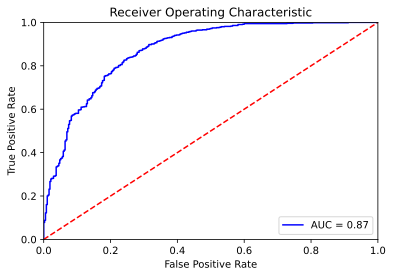

In [39]:
import sklearn.metrics as metrics

probs = bull_xgb_rcv3.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Save Bull Models

In [40]:
import pickle

pickling_on = open("models/bull_xgb_rcv1.pickle","wb")
pickle.dump(bull_xgb_rcv1.best_estimator_, pickling_on)
pickling_on.close()

pickling_on = open("models/bull_xgb_rcv2.pickle","wb")
pickle.dump(bull_xgb_rcv2.best_estimator_, pickling_on)
pickling_on.close()

pickling_on = open("models/bull_xgb_rcv3.pickle","wb")
pickle.dump(bull_xgb_rcv3.best_estimator_, pickling_on)
pickling_on.close()

#### Full Model

In [41]:
#Full features
X = full_df.drop(['bull_target', 'bear_target'], axis=1)
y = full_df['bear_target']
print(X.columns)

#Split into training, testing, validation sets
X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.30, random_state=24)
X_test, X_valid, y_test, y_valid = train_test_split(X_split, y_split, test_size=0.50, random_state=24)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.02],
        'n_estimators': [500, 600, 700, 800, 900]
        }


xgb = XGBClassifier(objective='binary:logistic')

fit_params={"early_stopping_rounds": 45, 
            "eval_set" : [[X_valid, y_valid]]}

bear_xgb_rcv1 = RandomizedSearchCV(xgb, param_distributions=params, scoring='f1',
                             n_jobs=-1, cv=2, verbose=3)

bear_xgb_rcv1.fit(X_train, y_train, **fit_params)

Index(['Returns', 'Unemployment Rate', 'Inflation Rate', 'Misery Index',
       'local_price', 'Bullish', 'Neutral', 'Bearish', 'EMA12_pctchg', 'RSI',
       'Pct_Chg', 'MACD_sentiment', 'Upper_BB_pctchg', 'Lower_BB_pctchg',
       'EMA_sentiment', 'Volume_sentiment'],
      dtype='object')
Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    0.9s remaining:    0.6s


[0]	validation_0-error:0.33889
Will train until validation_0-error hasn't improved in 45 rounds.
[1]	validation_0-error:0.30278
[2]	validation_0-error:0.29352
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30741
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30463
[7]	validation_0-error:0.30556
[8]	validation_0-error:0.30556
[9]	validation_0-error:0.30278
[10]	validation_0-error:0.31389
[11]	validation_0-error:0.31111
[12]	validation_0-error:0.30370
[13]	validation_0-error:0.30185
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.29815
[16]	validation_0-error:0.29722
[17]	validation_0-error:0.29630
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30093
[21]	validation_0-error:0.29537
[22]	validation_0-error:0.29352
[23]	validation_0-error:0.29352
[24]	validation_0-error:0.29259
[25]	validation_0-error:0.29352
[26]	validation_0-error:0.29259
[27]	validation_0-error:0.29167


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.2s finished


[28]	validation_0-error:0.29537
[29]	validation_0-error:0.28889
[30]	validation_0-error:0.28796
[31]	validation_0-error:0.28426
[32]	validation_0-error:0.28796
[33]	validation_0-error:0.28426
[34]	validation_0-error:0.28704
[35]	validation_0-error:0.28611
[36]	validation_0-error:0.28611
[37]	validation_0-error:0.28519
[38]	validation_0-error:0.28148
[39]	validation_0-error:0.27963
[40]	validation_0-error:0.28426
[41]	validation_0-error:0.28056
[42]	validation_0-error:0.28148
[43]	validation_0-error:0.28148
[44]	validation_0-error:0.27870
[45]	validation_0-error:0.27778
[46]	validation_0-error:0.27315
[47]	validation_0-error:0.27500
[48]	validation_0-error:0.27500
[49]	validation_0-error:0.27500
[50]	validation_0-error:0.27593
[51]	validation_0-error:0.27685
[52]	validation_0-error:0.27407
[53]	validation_0-error:0.27315
[54]	validation_0-error:0.27315
[55]	validation_0-error:0.27593
[56]	validation_0-error:0.27407
[57]	validation_0-error:0.27130
[58]	validation_0-error:0.27130
[59]	val

[279]	validation_0-error:0.16852
[280]	validation_0-error:0.16852
[281]	validation_0-error:0.16759
[282]	validation_0-error:0.16759
[283]	validation_0-error:0.16667
[284]	validation_0-error:0.16667
[285]	validation_0-error:0.16667
[286]	validation_0-error:0.16667
[287]	validation_0-error:0.16759
[288]	validation_0-error:0.16667
[289]	validation_0-error:0.16852
[290]	validation_0-error:0.16852
[291]	validation_0-error:0.16759
[292]	validation_0-error:0.16852
[293]	validation_0-error:0.16944
[294]	validation_0-error:0.16759
[295]	validation_0-error:0.16852
[296]	validation_0-error:0.16852
[297]	validation_0-error:0.16759
[298]	validation_0-error:0.16852
[299]	validation_0-error:0.16759
[300]	validation_0-error:0.16759
[301]	validation_0-error:0.16759
[302]	validation_0-error:0.16852
[303]	validation_0-error:0.16852
[304]	validation_0-error:0.16944
[305]	validation_0-error:0.16944
[306]	validation_0-error:0.16852
[307]	validation_0-error:0.16852
[308]	validation_0-error:0.16852
[309]	vali

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [42]:
train_predictions = bear_xgb_rcv1.best_estimator_.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, train_predictions))
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("=======================================================")
predictions = bear_xgb_rcv1.best_estimator_.predict(X_valid)
print("Validation Accuracy: ", accuracy_score(y_valid, predictions))
print(confusion_matrix(y_valid, predictions))
TN, FP, FN, TP = confusion_matrix(y_valid, predictions).ravel()
print(classification_report(y_valid, predictions))
print("=======================================================")
predictions = bear_xgb_rcv1.best_estimator_.predict(X_test)
print("Testing Accuracy: ", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
print(classification_report(y_test, predictions))

Training Accuracy:  0.8671300893743793
[[3069  129]
 [ 540 1297]]
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      3198
         1.0       0.91      0.71      0.79      1837

    accuracy                           0.87      5035
   macro avg       0.88      0.83      0.85      5035
weighted avg       0.87      0.87      0.86      5035

Validation Accuracy:  0.8351851851851851
[[657  35]
 [143 245]]
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       692
         1.0       0.88      0.63      0.73       388

    accuracy                           0.84      1080
   macro avg       0.85      0.79      0.81      1080
weighted avg       0.84      0.84      0.83      1080

Testing Accuracy:  0.8341056533827618
[[686  24]
 [155 214]]
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.88       710
         1.0       0.90      0.58      0.71   

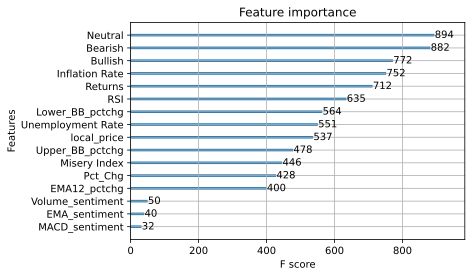

In [43]:
plot_importance(bear_xgb_rcv1.best_estimator_)
plt.show()

#### Drop Worst Features

In [44]:
X = full_df.drop(['bull_target', 'bear_target', 'Volume_sentiment', 'EMA_sentiment', 'MACD_sentiment', 'Pct_Chg',
                 'EMA12_pctchg', 'local_price'], 
                 axis=1)
print(X.columns)

y = full_df['bear_target']

#Split into training, testing, validation sets
X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.30, random_state=24)
X_test, X_valid, y_test, y_valid = train_test_split(X_split, y_split, test_size=0.50, random_state=24)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.02],
        'n_estimators': [400, 500, 600, 700, 800]
        }

xgb = XGBClassifier(objective='binary:logistic')

fit_params={"early_stopping_rounds": 45, 
            "eval_set" : [[X_valid, y_valid]]}

bear_xgb_rcv2 = RandomizedSearchCV(xgb, param_distributions=params, scoring='f1', 
                             n_jobs=-1, cv=10, verbose=3)

bear_xgb_rcv2.fit(X_train, y_train, **fit_params)

Index(['Returns', 'Unemployment Rate', 'Inflation Rate', 'Misery Index',
       'Bullish', 'Neutral', 'Bearish', 'RSI', 'Upper_BB_pctchg',
       'Lower_BB_pctchg'],
      dtype='object')
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.5s


[0]	validation_0-error:0.32685
Will train until validation_0-error hasn't improved in 45 rounds.
[1]	validation_0-error:0.31389
[2]	validation_0-error:0.31482
[3]	validation_0-error:0.30093
[4]	validation_0-error:0.30648
[5]	validation_0-error:0.29630
[6]	validation_0-error:0.29444
[7]	validation_0-error:0.29167
[8]	validation_0-error:0.29907
[9]	validation_0-error:0.29907
[10]	validation_0-error:0.29722
[11]	validation_0-error:0.29815
[12]	validation_0-error:0.30278
[13]	validation_0-error:0.30278
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.29630
[17]	validation_0-error:0.29722
[18]	validation_0-error:0.29537
[19]	validation_0-error:0.29537
[20]	validation_0-error:0.29444
[21]	validation_0-error:0.29722
[22]	validation_0-error:0.29630
[23]	validation_0-error:0.29537
[24]	validation_0-error:0.29259
[25]	validation_0-error:0.29167
[26]	validation_0-error:0.29167
[27]	validation_0-error:0.29167
[28]	validation_0-error:0.29074
[29]	validation_

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.8s finished


[39]	validation_0-error:0.28704
[40]	validation_0-error:0.28796
[41]	validation_0-error:0.28426
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28519
[44]	validation_0-error:0.28148
[45]	validation_0-error:0.28056
[46]	validation_0-error:0.28148
[47]	validation_0-error:0.28148
[48]	validation_0-error:0.27870
[49]	validation_0-error:0.27778
[50]	validation_0-error:0.27870
[51]	validation_0-error:0.27963
[52]	validation_0-error:0.27963
[53]	validation_0-error:0.27593
[54]	validation_0-error:0.27685
[55]	validation_0-error:0.27130
[56]	validation_0-error:0.26944
[57]	validation_0-error:0.26574
[58]	validation_0-error:0.27130
[59]	validation_0-error:0.26667
[60]	validation_0-error:0.26204
[61]	validation_0-error:0.26667
[62]	validation_0-error:0.26574
[63]	validation_0-error:0.26204
[64]	validation_0-error:0.26204
[65]	validation_0-error:0.25648
[66]	validation_0-error:0.26018
[67]	validation_0-error:0.25926
[68]	validation_0-error:0.25278
[69]	validation_0-error:0.25463
[70]	val

[290]	validation_0-error:0.17130
[291]	validation_0-error:0.17037
[292]	validation_0-error:0.17130
[293]	validation_0-error:0.17130
[294]	validation_0-error:0.17222
[295]	validation_0-error:0.17222
[296]	validation_0-error:0.17222
[297]	validation_0-error:0.17130
[298]	validation_0-error:0.17130
[299]	validation_0-error:0.17222
[300]	validation_0-error:0.17222
[301]	validation_0-error:0.17222
[302]	validation_0-error:0.17130
[303]	validation_0-error:0.17130
[304]	validation_0-error:0.17222
[305]	validation_0-error:0.17130
[306]	validation_0-error:0.17130
[307]	validation_0-error:0.17130
Stopping. Best iteration:
[262]	validation_0-error:0.16759



RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [45]:
train_predictions = bear_xgb_rcv2.best_estimator_.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, train_predictions))
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("=======================================================")
predictions = bear_xgb_rcv2.best_estimator_.predict(X_valid)
print("Validation Accuracy: ", accuracy_score(y_valid, predictions))
print(confusion_matrix(y_valid, predictions))
TN, FP, FN, TP = confusion_matrix(y_valid, predictions).ravel()
print(classification_report(y_valid, predictions))
print("=======================================================")
predictions = bear_xgb_rcv2.best_estimator_.predict(X_test)
print("Testing Accuracy: ", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
print(classification_report(y_test, predictions))

Training Accuracy:  0.8691161866931479
[[3064  134]
 [ 525 1312]]
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      3198
         1.0       0.91      0.71      0.80      1837

    accuracy                           0.87      5035
   macro avg       0.88      0.84      0.85      5035
weighted avg       0.87      0.87      0.87      5035

Validation Accuracy:  0.8324074074074074
[[651  41]
 [140 248]]
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       692
         1.0       0.86      0.64      0.73       388

    accuracy                           0.83      1080
   macro avg       0.84      0.79      0.81      1080
weighted avg       0.84      0.83      0.83      1080

Testing Accuracy:  0.8415199258572753
[[685  25]
 [146 223]]
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89       710
         1.0       0.90      0.60      0.72   

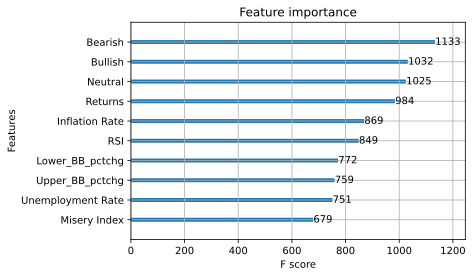

In [46]:
plot_importance(bear_xgb_rcv2.best_estimator_)
plt.show()

#### Keep Best Features

In [47]:
X = full_df[['Bearish', 'Bullish', 'Neutral', 'Returns', 'Inflation Rate', 'Lower_BB_pctchg', 
             'Unemployment Rate', 'Upper_BB_pctchg']]
y = full_df['bear_target']

#Split into training, testing, validation sets
X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.30, random_state=24)
X_test, X_valid, y_test, y_valid = train_test_split(X_split, y_split, test_size=0.50, random_state=24)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.02],
        'n_estimators': [400, 500, 600, 700, 800]
        }

xgb = XGBClassifier(objective='binary:logistic')

fit_params={"early_stopping_rounds": 45, 
            "eval_set" : [[X_valid, y_valid]]}

bear_xgb_rcv3 = RandomizedSearchCV(xgb, param_distributions=params, scoring='f1', 
                             n_jobs=-1, cv=10, verbose=3)

bear_xgb_rcv3.fit(X_train, y_train, **fit_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.6s


[0]	validation_0-error:0.31944
Will train until validation_0-error hasn't improved in 45 rounds.
[1]	validation_0-error:0.30833
[2]	validation_0-error:0.31482
[3]	validation_0-error:0.30556
[4]	validation_0-error:0.30463
[5]	validation_0-error:0.30185
[6]	validation_0-error:0.30370
[7]	validation_0-error:0.30463
[8]	validation_0-error:0.30278
[9]	validation_0-error:0.30278
[10]	validation_0-error:0.30185
[11]	validation_0-error:0.30185
[12]	validation_0-error:0.30370
[13]	validation_0-error:0.29722
[14]	validation_0-error:0.29722
[15]	validation_0-error:0.29630
[16]	validation_0-error:0.29722
[17]	validation_0-error:0.29537
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.29444
[20]	validation_0-error:0.29630
[21]	validation_0-error:0.29537
[22]	validation_0-error:0.29352
[23]	validation_0-error:0.29352
[24]	validation_0-error:0.29167
[25]	validation_0-error:0.28981
[26]	validation_0-error:0.28981
[27]	validation_0-error:0.28981
[28]	validation_0-error:0.29074
[29]	validation_

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.2s finished


[39]	validation_0-error:0.28981
[40]	validation_0-error:0.28426
[41]	validation_0-error:0.28611
[42]	validation_0-error:0.28796
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28056
[45]	validation_0-error:0.27870
[46]	validation_0-error:0.27685
[47]	validation_0-error:0.28148
[48]	validation_0-error:0.27685
[49]	validation_0-error:0.27685
[50]	validation_0-error:0.27778
[51]	validation_0-error:0.27407
[52]	validation_0-error:0.27222
[53]	validation_0-error:0.27037
[54]	validation_0-error:0.27037
[55]	validation_0-error:0.26389
[56]	validation_0-error:0.26296
[57]	validation_0-error:0.26574
[58]	validation_0-error:0.26574
[59]	validation_0-error:0.26574
[60]	validation_0-error:0.26296
[61]	validation_0-error:0.26204
[62]	validation_0-error:0.26111
[63]	validation_0-error:0.26204
[64]	validation_0-error:0.26111
[65]	validation_0-error:0.26296
[66]	validation_0-error:0.25926
[67]	validation_0-error:0.25556
[68]	validation_0-error:0.25833
[69]	validation_0-error:0.25833
[70]	val

[290]	validation_0-error:0.17963
[291]	validation_0-error:0.17870
[292]	validation_0-error:0.17870
[293]	validation_0-error:0.17870
[294]	validation_0-error:0.17778
[295]	validation_0-error:0.17685
[296]	validation_0-error:0.17778
[297]	validation_0-error:0.17870
[298]	validation_0-error:0.17870
[299]	validation_0-error:0.17870
[300]	validation_0-error:0.17870
[301]	validation_0-error:0.17778
[302]	validation_0-error:0.17778
[303]	validation_0-error:0.17778
[304]	validation_0-error:0.17778
[305]	validation_0-error:0.17685
[306]	validation_0-error:0.17593
[307]	validation_0-error:0.17593
[308]	validation_0-error:0.17593
[309]	validation_0-error:0.17685
[310]	validation_0-error:0.17870
[311]	validation_0-error:0.17870
[312]	validation_0-error:0.17963
[313]	validation_0-error:0.18056
[314]	validation_0-error:0.18056
[315]	validation_0-error:0.17963
[316]	validation_0-error:0.17963
[317]	validation_0-error:0.17963
[318]	validation_0-error:0.17870
[319]	validation_0-error:0.17778
[320]	vali

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [51]:
X_train.columns

Index(['Bearish', 'Bullish', 'Neutral', 'Returns', 'Inflation Rate',
       'Lower_BB_pctchg', 'Unemployment Rate', 'Upper_BB_pctchg'],
      dtype='object')

In [48]:
train_predictions = bear_xgb_rcv3.best_estimator_.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, train_predictions))
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("=======================================================")
predictions = bear_xgb_rcv3.best_estimator_.predict(X_valid)
print("Validation Accuracy: ", accuracy_score(y_valid, predictions))
print(confusion_matrix(y_valid, predictions))
TN, FP, FN, TP = confusion_matrix(y_valid, predictions).ravel()
print(classification_report(y_valid, predictions))
print("=======================================================")
predictions = bear_xgb_rcv3.best_estimator_.predict(X_test)
print("Testing Accuracy: ", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
print(classification_report(y_test, predictions))

Training Accuracy:  0.8669314796425025
[[3042  156]
 [ 514 1323]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      3198
         1.0       0.89      0.72      0.80      1837

    accuracy                           0.87      5035
   macro avg       0.87      0.84      0.85      5035
weighted avg       0.87      0.87      0.86      5035

Validation Accuracy:  0.8314814814814815
[[647  45]
 [137 251]]
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       692
         1.0       0.85      0.65      0.73       388

    accuracy                           0.83      1080
   macro avg       0.84      0.79      0.81      1080
weighted avg       0.83      0.83      0.83      1080

Testing Accuracy:  0.8443002780352178
[[684  26]
 [142 227]]
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       710
         1.0       0.90      0.62      0.73   

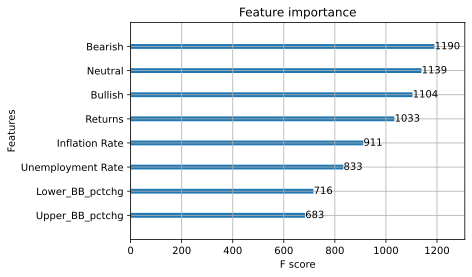

In [49]:
plot_importance(bear_xgb_rcv3.best_estimator_)
plt.show()

In [50]:
import pickle

pickling_on = open("models/bear_xgb_rcv1.pickle","wb")
pickle.dump(bear_xgb_rcv1.best_estimator_, pickling_on)
pickling_on.close()

pickling_on = open("models/bear_xgb_rcv2.pickle","wb")
pickle.dump(bear_xgb_rcv2.best_estimator_, pickling_on)
pickling_on.close()

pickling_on = open("models/bear_xgb_rcv3.pickle","wb")
pickle.dump(bear_xgb_rcv3.best_estimator_, pickling_on)
pickling_on.close()